### LSTM

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
training_set = pd.read_csv('Google_Stock_Price_Train.csv').iloc[:,1:2].values
## we use 1:2, instead of 1 , because it will , convert the array into a matrix.
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

Next we are scaling the matrix , using the __normalization__ method, to make the training more efficient and faster.

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
sc = MinMaxScaler()

In [6]:
training_set = sc.fit_transform(training_set)

In [7]:
training_set

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

Here we have used the normalization method to make the training more faster and efficient. Normalization method is nothing but 
the formula

```
norm(x) = (x - min(x)) / (max(x) - min(x))
```

In [8]:
X_train = training_set[0:1257]
y_train = training_set[1:1258]

In [9]:
X_train = np.reshape(X_train, (1257, 1, 1))

In [10]:
X_train

array([[[0.08581368]],

       [[0.09701243]],

       [[0.09433366]],

       ...,

       [[0.95163331]],

       [[0.95725128]],

       [[0.93796041]]])

Here, we made the X_train into a 3D array, because , Keras asks for a 3D vector to be passed in. Also, the first argument is the number of observations 1257 , the second argument is the timestep, i.e. the input is of the format time (t) and the output is of the format time (t+1), since ,we are predicting the data for a day later . Thus (t + 1 - t) gives 1, and the final argument is also 1, since it is the feature . We have only feature that is the stock price at a given time . 

In [11]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

C:\Users\Divyansh\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [12]:
regressor = Sequential()
## We are using Sequential class , since the network is a sequense of layer . We will be using a graph, when we want to do unsupervised 
## deep learning , like self-organising maps.
## Dense layer is to tell the network that we will be using a dense output layer .

In [13]:
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

In [14]:
regressor.add(Dense(units = 1))

In [15]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [16]:
regressor.fit(X_train, y_train, batch_size=32, epochs = 200)

Epoch 1/200
1257/1257 [==============================] - 1s 901us/step - loss: 0.1877
Epoch 2/200
1257/1257 [==============================] - 0s 84us/step - loss: 0.1356
Epoch 3/200
1257/1257 [==============================] - 0s 83us/step - loss: 0.1043
Epoch 4/200
1257/1257 [==============================] - 0s 80us/step - loss: 0.0876
Epoch 5/200
1257/1257 [==============================] - 0s 82us/step - loss: 0.0796
Epoch 6/200
1257/1257 [==============================] - 0s 79us/step - loss: 0.0761
Epoch 7/200
1257/1257 [==============================] - 0s 83us/step - loss: 0.0743
Epoch 8/200
1257/1257 [==============================] - 0s 80us/step - loss: 0.0730
Epoch 9/200
1257/1257 [==============================] - 0s 89us/step - loss: 0.0718
Epoch 10/200
1257/1257 [==============================] - 0s 79us/step - loss: 0.0707
Epoch 11/200
1257/1257 [==============================] - 0s 83us/step - loss: 0.0695
Epoch 12/200
1257/1257 [==============================] - 0s 8

1257/1257 [==============================] - 0s 106us/step - loss: 2.7062e-04
Epoch 95/200
1257/1257 [==============================] - 0s 92us/step - loss: 2.7125e-04
Epoch 96/200
1257/1257 [==============================] - 0s 107us/step - loss: 2.7028e-04
Epoch 97/200
1257/1257 [==============================] - 0s 107us/step - loss: 2.7036e-04
Epoch 98/200
1257/1257 [==============================] - 0s 113us/step - loss: 2.6982e-04
Epoch 99/200
1257/1257 [==============================] - 0s 126us/step - loss: 2.7015e-04
Epoch 100/200
1257/1257 [==============================] - 0s 108us/step - loss: 2.6795e-04
Epoch 101/200
1257/1257 [==============================] - 0s 115us/step - loss: 2.6824e-04
Epoch 102/200
1257/1257 [==============================] - 0s 98us/step - loss: 2.6481e-04
Epoch 103/200
1257/1257 [==============================] - 0s 134us/step - loss: 2.6727e-04 0s - loss: 2.6766e-
Epoch 104/200
1257/1257 [==============================] - 0s 90us/step - loss: 2

1257/1257 [==============================] - 0s 114us/step - loss: 2.5280e-04
Epoch 184/200
1257/1257 [==============================] - 0s 96us/step - loss: 2.5417e-04
Epoch 185/200
1257/1257 [==============================] - 0s 124us/step - loss: 2.5362e-04
Epoch 186/200
1257/1257 [==============================] - 0s 148us/step - loss: 2.5220e-04
Epoch 187/200
1257/1257 [==============================] - 0s 194us/step - loss: 2.5674e-04
Epoch 188/200
1257/1257 [==============================] - 0s 204us/step - loss: 2.5214e-04
Epoch 189/200
1257/1257 [==============================] - 0s 254us/step - loss: 2.5327e-04
Epoch 190/200
1257/1257 [==============================] - 0s 143us/step - loss: 2.5451e-04
Epoch 191/200
1257/1257 [==============================] - 0s 115us/step - loss: 2.5196e-04
Epoch 192/200
1257/1257 [==============================] - 0s 143us/step - loss: 2.5386e-04
Epoch 193/200
1257/1257 [==============================] - 0s 213us/step - loss: 2.5429e-04
Epo

In [17]:
test_set = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = test_set.iloc[: ,1:2].values

In [19]:
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [20]:
inputs = sc.transform(real_stock_price)

In [21]:
inputs = np.reshape(inputs, (20,1,1))

In [22]:
predicted_stock_price = regressor.predict(inputs)

In [23]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [27]:
predicted_stock_price

array([[778.69727],
       [787.5005 ],
       [785.4006 ],
       [793.84937],
       [804.0795 ],
       [805.4185 ],
       [802.7952 ],
       [804.7582 ],
       [805.06995],
       [804.7031 ],
       [803.53827],
       [802.9052 ],
       [804.54724],
       [804.8591 ],
       [818.63794],
       [825.3235 ],
       [832.7717 ],
       [829.96625],
       [811.6488 ],
       [795.3203 ]], dtype=float32)

In [28]:
%matplotlib inline

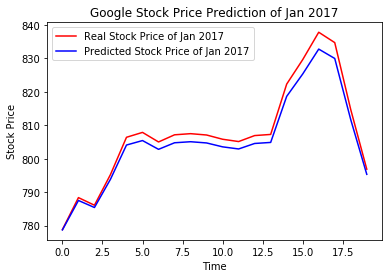

In [29]:
plt.plot(real_stock_price, color='red', label = 'Real Stock Price of Jan 2017')
plt.plot(predicted_stock_price, color='blue', label = 'Predicted Stock Price of Jan 2017')
plt.title('Google Stock Price Prediction of Jan 2017')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()